In [38]:
# ==========================================================
# Airbnb Data Analysis Dashboard
# ==========================================================
# Author: Harshita Maurya
# Description: Exploratory Data Analysis (EDA) of Airbnb data
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Visualization Settings ---
sns.set_theme(style="whitegrid")
plt.rcParams["figure.dpi"] = 120

In [39]:
# ==========================================================
# 1. LOAD AND PREPARE DATA
# ==========================================================
file_path = "1730285881-Airbnb_Open_Data.xlsx"

try:
    df = pd.read_excel(file_path)
    print("✅ Data loaded successfully!")
except FileNotFoundError:
    raise FileNotFoundError(f"❌ File not found: {file_path}\nPlease check the file path.")

# Clean and standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert price and service_fee to numeric
df["price"] = pd.to_numeric(df["price"], errors="coerce")
if "service_fee" in df.columns:
    df["service_fee"] = pd.to_numeric(df["service_fee"], errors="coerce")

# Drop rows with missing prices
df = df.dropna(subset=["price"])

print(f"📊 Dataset Shape: {df.shape}")
print(f"🧩 Columns: {list(df.columns)}\n")

✅ Data loaded successfully!
📊 Dataset Shape: (102352, 26)
🧩 Columns: ['id', 'name', 'host_id', 'host_identity_verified', 'host_name', 'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country', 'country_code', 'instant_bookable', 'cancellation_policy', 'room_type', 'construction_year', 'price', 'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count', 'availability_365', 'house_rules', 'license']



/tmp/ipython-input-4076085536.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=host_counts.index, y=host_counts.values, palette="viridis")


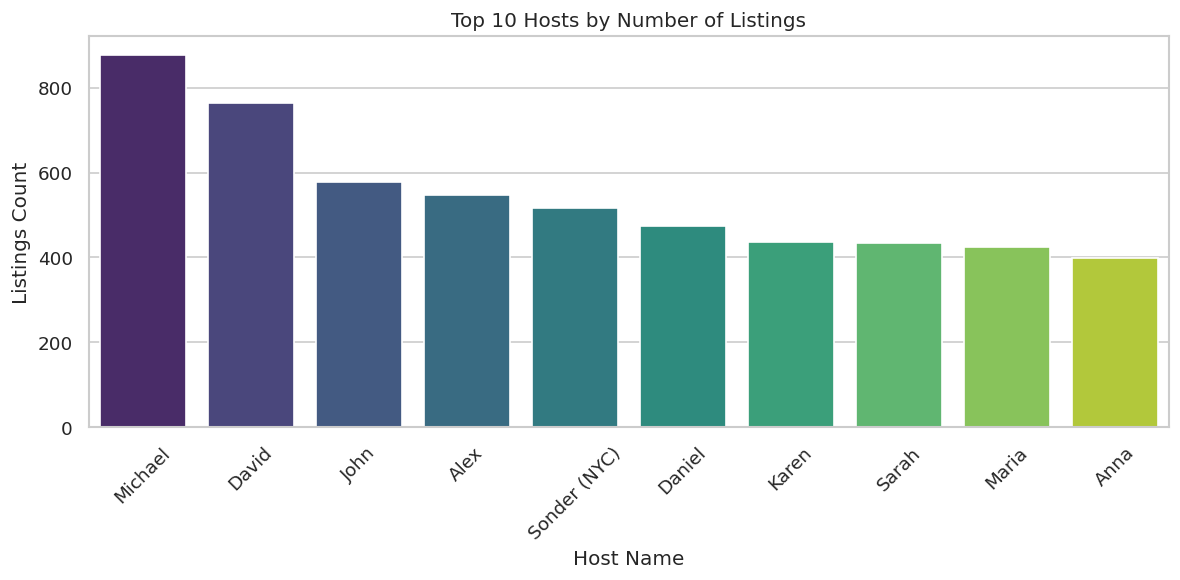

In [40]:
# ==========================================================
# 2. HOST ANALYSIS
# ==========================================================
if "host_name" in df.columns:
    host_counts = df.groupby("host_name")["id"].count().nlargest(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=host_counts.index, y=host_counts.values, palette="viridis")
    plt.title("Top 10 Hosts by Number of Listings")
    plt.xlabel("Host Name")
    plt.ylabel("Listings Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Host name column not found.\n")

/tmp/ipython-input-4094700859.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neigh_counts.index, y=neigh_counts.values, palette="mako")


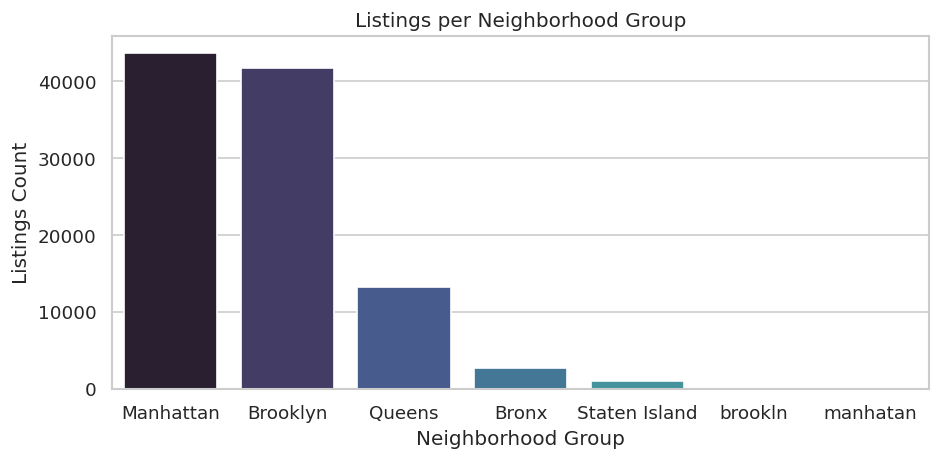

/tmp/ipython-input-4094700859.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_neigh.index, y=avg_price_neigh.values, palette="crest")


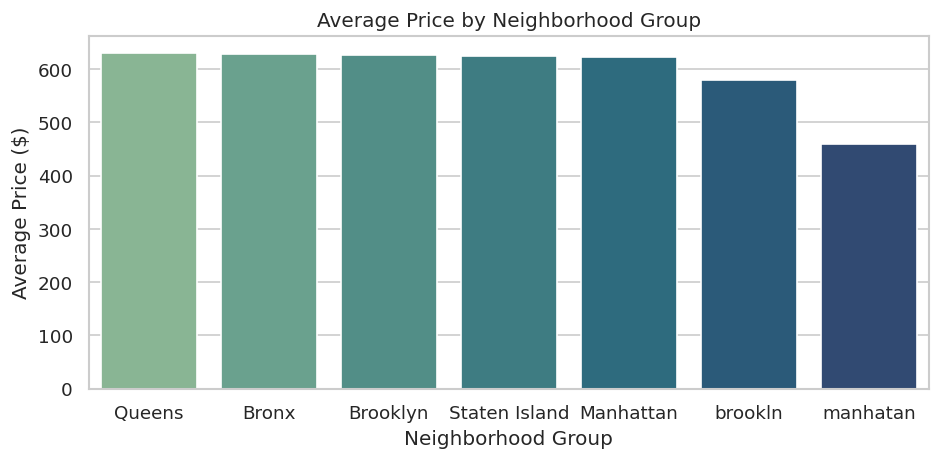

In [41]:
# ==========================================================
# 3. NEIGHBORHOOD ANALYSIS
# ==========================================================
if "neighbourhood_group" in df.columns:
    # Listing counts
    neigh_counts = df["neighbourhood_group"].value_counts()
    plt.figure(figsize=(8, 4))
    sns.barplot(x=neigh_counts.index, y=neigh_counts.values, palette="mako")
    plt.title("Listings per Neighborhood Group")
    plt.xlabel("Neighborhood Group")
    plt.ylabel("Listings Count")
    plt.tight_layout()
    plt.show()

    # Average price by neighborhood
    avg_price_neigh = df.groupby("neighbourhood_group")["price"].mean().sort_values(ascending=False)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=avg_price_neigh.index, y=avg_price_neigh.values, palette="crest")
    plt.title("Average Price by Neighborhood Group")
    plt.xlabel("Neighborhood Group")
    plt.ylabel("Average Price ($)")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Neighborhood group data not available.\n")

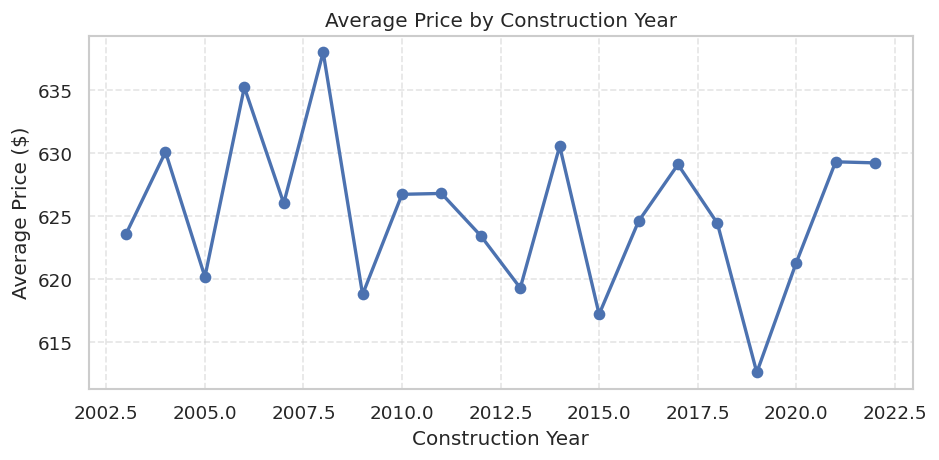

In [42]:

# ==========================================================
# 4. PRICE TRENDS
# ==========================================================
if "construction_year" in df.columns:
    avg_price_year = df.groupby("construction_year")["price"].mean()
    plt.figure(figsize=(8, 4))
    plt.plot(avg_price_year, marker="o", linewidth=2)
    plt.title("Average Price by Construction Year")
    plt.xlabel("Construction Year")
    plt.ylabel("Average Price ($)")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


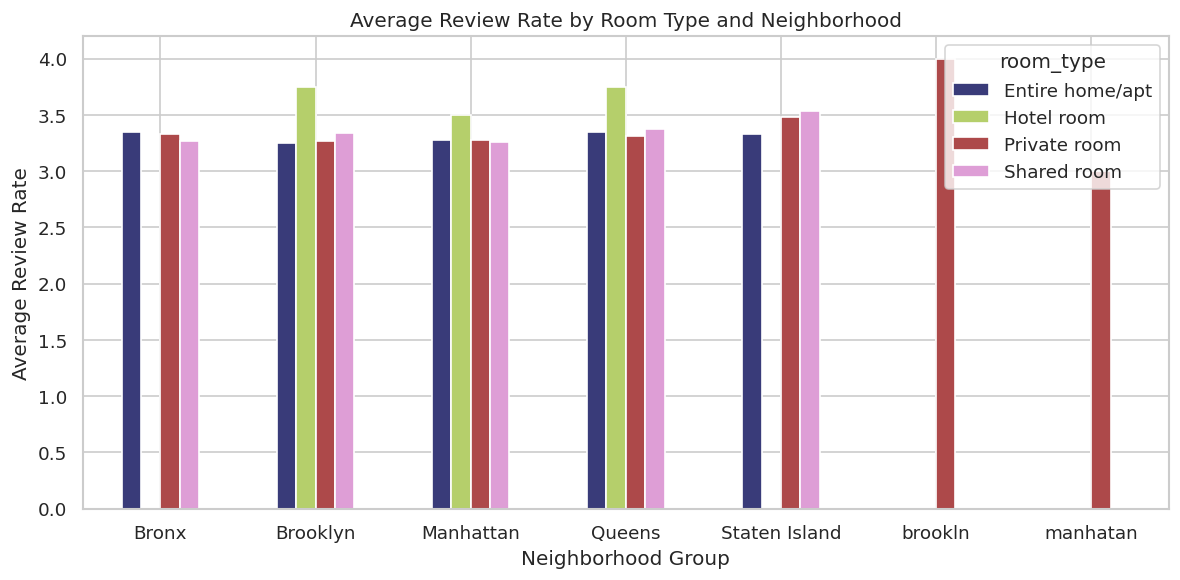

/tmp/ipython-input-2639258218.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="host_identity_verified", y="review_rate_number", data=df, palette="Set2")


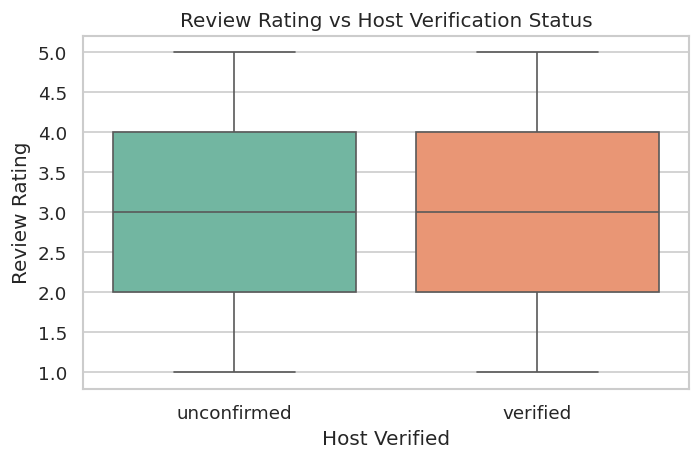

In [43]:

# ==========================================================
# 5. REVIEW ANALYSIS
# ==========================================================
if {"neighbourhood_group", "room_type", "review_rate_number"}.issubset(df.columns):
    avg_review = df.groupby(["neighbourhood_group", "room_type"])["review_rate_number"].mean().unstack()
    avg_review.plot(kind="bar", figsize=(10, 5), colormap="tab20b")
    plt.title("Average Review Rate by Room Type and Neighborhood")
    plt.xlabel("Neighborhood Group")
    plt.ylabel("Average Review Rate")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

if {"host_identity_verified", "review_rate_number"}.issubset(df.columns):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="host_identity_verified", y="review_rate_number", data=df, palette="Set2")
    plt.title("Review Rating vs Host Verification Status")
    plt.xlabel("Host Verified")
    plt.ylabel("Review Rating")
    plt.tight_layout()
    plt.show()

📈 Correlation (Price vs Service Fee): 1.000


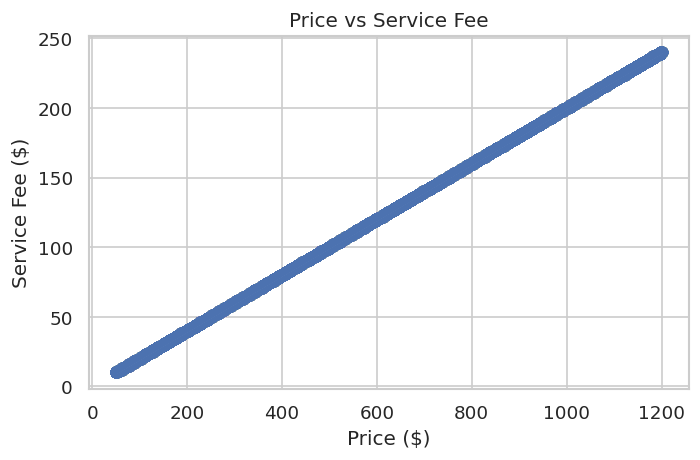

📉 Correlation (Host Listings Count vs Availability): 0.160


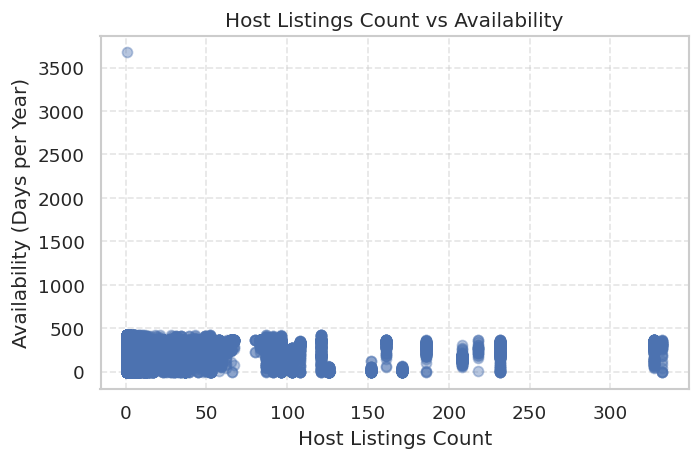

In [44]:

# ==========================================================
# 6. CORRELATIONS
# ==========================================================
if {"price", "service_fee"}.issubset(df.columns):
    corr_ps = df["price"].corr(df["service_fee"])
    print(f"📈 Correlation (Price vs Service Fee): {corr_ps:.3f}")
    plt.figure(figsize=(6, 4))
    sns.regplot(x="price", y="service_fee", data=df, scatter_kws={"alpha": 0.4})
    plt.title("Price vs Service Fee")
    plt.xlabel("Price ($)")
    plt.ylabel("Service Fee ($)")
    plt.tight_layout()
    plt.show()

if {"calculated_host_listings_count", "availability_365"}.issubset(df.columns):
    corr_ha = df["calculated_host_listings_count"].corr(df["availability_365"])
    print(f"📉 Correlation (Host Listings Count vs Availability): {corr_ha:.3f}")
    plt.figure(figsize=(6, 4))
    plt.scatter(df["calculated_host_listings_count"], df["availability_365"], alpha=0.4)
    plt.title("Host Listings Count vs Availability")
    plt.xlabel("Host Listings Count")
    plt.ylabel("Availability (Days per Year)")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


In [45]:
# ==========================================================
# 7. SUMMARY INSIGHTS
# ==========================================================
print("""
==========================================================
📊 Airbnb Data Analysis — Summary
==========================================================
✅ Top hosts manage multiple listings.
✅ Neighborhoods differ significantly in price and density.
✅ Verified hosts generally receive slightly higher reviews.
✅ Price and service fee show moderate correlation.
✅ Host availability often decreases as listings increase.

🧠 Next Steps:
- Perform sentiment analysis on guest reviews.
- Build geographic heatmaps for pricing insights.
- Explore temporal trends in bookings and reviews.

Analysis Complete ✅
==========================================================
""")


📊 Airbnb Data Analysis — Summary
✅ Top hosts manage multiple listings.
✅ Neighborhoods differ significantly in price and density.
✅ Verified hosts generally receive slightly higher reviews.
✅ Price and service fee show moderate correlation.
✅ Host availability often decreases as listings increase.

🧠 Next Steps:
- Perform sentiment analysis on guest reviews.
- Build geographic heatmaps for pricing insights.
- Explore temporal trends in bookings and reviews.

Analysis Complete ✅

